# GIS Data Science Assignment: Climate Change Analysis in Tanzania

In this assignment, you will analyze climate change patterns in Tanzania using GIS data. You will work with spatial data to understand, visualize, and analyze climate trends across different regions of Tanzania.

## Setup
First, let's import the necessary libraries:

In [6]:
# Run this cell to install any missing dependencies
! pip install geopandas matplotlib numpy pandas seaborn folium mapclassify xarray rasterio contextily

In [7]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
from matplotlib.colors import ListedColormap
import contextily as ctx

# Set plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")

## Part 1: GIS Data Basics

### Task 1.1: Load the Tanzania Shapefile
Load the Tanzania administrative boundaries shapefile and examine its structure.

In [18]:
# TODO: Load the Tanzania shapefile
# Hint: Use gpd.read_file() to load the shapefile
tz_shapefile = gpd.read_file('data/tanzania_regions.shp')

# Reprojection for area calculation
tz_shapefile = tz_shapefile.to_crs(epsg=32737)


# Function to display basic information about a GeoDataFrame
def describe_geodataframe(gdf):
    """Display basic information about a GeoDataFrame.

    Parameters:
    gdf (GeoDataFrame): The GeoDataFrame to describe
    
    Returns:
    dict: A dictionary containing basic information about the GeoDataFrame
    """

    info = {
        'crs': gdf.crs,  # TODO: Get the coordinate reference system
        'geometry_type': gdf.geom_type.unique(),  # TODO: Get the geometry type
        'num_features': len(gdf),  # TODO: Get the number of features
        'attributes': gdf.columns.tolist(),  # TODO: Get the attribute column names
        'total_area': gdf.geometry.area.sum() / 1e6,  # TODO: Calculate the total area in square kilometers
        'bounds': gdf.total_bounds  # TODO: Get the bounds of the dataset
    }
    return info

# Call the function with your loaded shapefile
tz_info = describe_geodataframe(tz_shapefile)
print(tz_info)
tz_shapefile.describe
tz_shapefile.head()


{'crs': <Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, 'geometry_type': array(['Polygon'], dtype=object), 'num_features': 31, 'attributes': ['REGION_NAM', 'REGION_COD', 'ZONE', 'LAND_AREA_', 'POPULATION', 'POP_DENSIT', 'ELEVATION_', 'DIST_TO_CO', 'geometry'], 'total_area': 334464.65426470654, 'bounds': array([-489246.31117371, 8676633.7368711 ,  644767.91559504,
       9888892.82344407])}


,REGION_NAM,REGION_COD,ZONE,LAND_AREA_,POPULATION,POP_DENSIT,ELEVATION_,DIST_TO_CO,geometry
0,Arusha,AR,Northern,8238.33,523949,63.60,920.2,469.3,"POLYGON ((-5675.153 9729669.484, -35347.976 96..."
1,Dar es Salaam,DS,Eastern,7765.76,311157,40.07,1298.9,257.1,"POLYGON ((467548.11 9825593.646, 445025.371 97..."
2,Dodoma,DO,Central,10271.91,784652,76.39,1790.4,416.6,"POLYGON ((222382.662 8778916.926, 198563.033 8..."
3,Geita,GE,Lake,11836.41,565591,47.78,1440.9,460.9,"POLYGON ((-202510.329 9155932.554, -214927.796..."
4,Iringa,IR,Southern Highlands,18649.73,214091,11.48,476.1,82.6,"POLYGON ((-249647.748 8938011.307, -301108.362..."


### Task 1.2: Understand Coordinate Reference Systems
Explain the current CRS and reproject the data to a suitable projection for Tanzania.

In [9]:
# TODO: Identify the current CRS and explain why it might not be optimal for Tanzania
print(f"Original CRS: {tz_shapefile.crs}")

# TODO: Reproject the data to a more appropriate CRS for Tanzania
# Hint: Consider using EPSG:21037 (Arc 1960 / UTM zone 37S) which is suitable for Tanzania
tz_projected = tz_shapefile.to_crs(epsg=21037)

# TODO: Compare the original and reprojected data
# Hint: Create a function that compares areas before and after reprojection

def compare_projections(original_gdf, reprojected_gdf):
    """Compare the original and reprojected GeoDataFrames.
    
    Parameters:
    original_gdf (GeoDataFrame): The original GeoDataFrame
    reprojected_gdf (GeoDataFrame): The reprojected GeoDataFrame
    
    Returns:
    dict: A dictionary containing comparison metrics
    """
    # calcualte total area (convert to km²)
    original_area = original_gdf.geometry.area.sum() / 1e6  # Convert m² to km²
    new_area = reprojected_gdf.geometry.area.sum() / 1e6  # Convert m² to km²
    
    # Calculate percentage difference
    percent_diff = ((new_area - original_area) / original_area) * 100 if original_area != 0 else None

    
    comparison = {
        'original_crs': original_gdf.crs,  # TODO: Get the original CRS
        'new_crs': reprojected_gdf.crs,  # TODO: Get the new CRS
        'original_area': original_area,  # TODO: Calculate the total area in the original projection
        'new_area': new_area,  # TODO: Calculate the total area in the new projection
        'percent_difference': percent_diff  # TODO: Calculate the percentage difference in area
    }
    return comparison

# Call the comparison function
projection_comparison = compare_projections(tz_shapefile, tz_projected)

# print result
print(projection_comparison)

Original CRS: EPSG:32737
{'original_crs': <Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, 'new_crs': <Projected CRS: EPSG:21037>
Name: Arc 1960 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Kenya - south of equator and east of 36°E; Tanzania - east of 36°E.
- bounds: (36.0, -11.75, 41.6, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: Arc 1960
- Ellipsoid: Clarke 1880 (RGS)
- Prime Meridian: Greenwich
, 'original_area': 334464.65426470654, 'new_area': 334462.32

## Part 2: Data Loading and Processing

### Task 2.1: Load Climate Data
Load the provided climate data for Tanzania and examine its structure.

In [19]:
# TODO: Load the climate data CSV file
climate_data = pd.read_csv('data/tanzania_monthly_climate_data.csv')

# TODO: Display the first few rows and basic statistics of the climate data
# Hint: Use .head(), .describe(), and .info() methods
# display first 5 rows
print(climate_data.head())

print(climate_data.describe())

print(climate_data.info())

# TODO: Check for missing values and handle them appropriately
def check_missing_values(df):
    """Check for missing values in a DataFrame and return a summary.
    
    Parameters:
    df (DataFrame): The DataFrame to check
    
    Returns:
    DataFrame: A summary of missing values by column
    """
    missing_values = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100

    # create a df with results
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values,
        'Missing Percent':missing_percent
    })

    # Only display columns with at least one missing value
    return missing_summary[missing_summary['Missing Values'] > 0]

    
# TODO: Implement this function

missing_summary = check_missing_values(climate_data)
print(missing_summary)



  REGION_CODE REGION_NAME  YEAR  MONTH      ZONE  AVG_TEMP_C  MAX_TEMP_C  \
0          AR      Arusha  2000      1  Northern       22.91       25.50   
1          AR      Arusha  2000      2  Northern       23.11       25.57   
2          AR      Arusha  2000      3  Northern       22.61       25.19   
3          AR      Arusha  2000      4  Northern       21.91       24.96   
4          AR      Arusha  2000      5  Northern       20.91       24.17   

   MIN_TEMP_C  TEMP_RANGE_C  PRECIPITATION_MM  RAIN_DAYS  HEAVY_RAIN_DAYS  \
0       20.31          5.19             696.7         13                0   
1       21.08          4.48             611.9          8                2   
2       18.69          6.49            1036.1         14                2   
3       18.65          6.31            1290.6         25                9   
4       17.64          6.52             866.4         13                3   

   DROUGHT_INDEX  ELEVATION_M  DISTANCE_TO_COAST_KM  
0           0.16        92

### Task 2.2: Join Climate Data with Spatial Data
Merge the climate data with the Tanzania shapefile based on a common identifier.

In [22]:
# TODO: Identify the common field between the climate data and the shapefile
# Hint: Look for a region/district identifier in both datasets

# TODO: Join the climate data with the shapefile
# Hint: Use the merge() or join() method


tz_shp = gpd.read_file('data/tanzania_regions.shp')

# verify column names
print("Shapefile columns:", tz_shp.columns.tolist())
print("Climate data columns:", climate_data.columns.tolist())

# handle typos
tz_shp.rename(columns={'REGION_COD': 'REGION_CODE'}, inplace=True)
climate_data.rename(columns={'region_code': 'REGION_CODE'}, inplace=True)

# check data type
print("Shapefile REGION_CODE dtype:", tz_shp['REGION_CODE'].dtype)
print("Climate data REGION_CODE dtype:", climate_data['REGION_CODE'].dtype)


tz_climate = tz_shp.merge(climate_data, on='REGION_CODE', how='left')

# TODO: Verify the join was successful by checking the shape and contents of the result
def verify_join(original_gdf, joined_gdf, climate_df):
    """Verify that the join between spatial and climate data was successful.
    
    Parameters:
    original_gdf (GeoDataFrame): The original spatial GeoDataFrame
    joined_gdf (GeoDataFrame): The joined GeoDataFrame
    climate_df (DataFrame): The climate DataFrame
    
    Returns:
    dict: A dictionary containing verification metrics
    """
    verification = {
        'original_features': len(original_gdf),  # TODO: Get the number of features in the original GeoDataFrame
        'joined_features': len(joined_gdf),  # TODO: Get the number of features in the joined GeoDataFrame
        'climate_records': len(climate_data),  # TODO: Get the number of records in the climate DataFrame
        'joined_columns': joined_gdf.columns.tolist(),  # TODO: Get the column names in the joined GeoDataFrame
        'is_successful': len(joined_gdf) > 0 and 
                         any (col in joined_gdf.columns for col in climate_data)  # TODO: Determine if the join was successful
    }
    return verification

# call the function to verify
join_verification = verify_join(tz_shp, tz_climate, climate_data)
print(join_verification)



Shapefile columns: ['REGION_NAM', 'REGION_COD', 'ZONE', 'LAND_AREA_', 'POPULATION', 'POP_DENSIT', 'ELEVATION_', 'DIST_TO_CO', 'geometry']
Climate data columns: ['REGION_CODE', 'REGION_NAME', 'YEAR', 'MONTH', 'ZONE', 'AVG_TEMP_C', 'MAX_TEMP_C', 'MIN_TEMP_C', 'TEMP_RANGE_C', 'PRECIPITATION_MM', 'RAIN_DAYS', 'HEAVY_RAIN_DAYS', 'DROUGHT_INDEX', 'ELEVATION_M', 'DISTANCE_TO_COAST_KM']
Shapefile REGION_CODE dtype: object
Climate data REGION_CODE dtype: object
{'original_features': 31, 'joined_features': 8928, 'climate_records': 8928, 'joined_columns': ['REGION_NAM', 'REGION_CODE', 'ZONE_x', 'LAND_AREA_', 'POPULATION', 'POP_DENSIT', 'ELEVATION_', 'DIST_TO_CO', 'geometry', 'REGION_NAME', 'YEAR', 'MONTH', 'ZONE_y', 'AVG_TEMP_C', 'MAX_TEMP_C', 'MIN_TEMP_C', 'TEMP_RANGE_C', 'PRECIPITATION_MM', 'RAIN_DAYS', 'HEAVY_RAIN_DAYS', 'DROUGHT_INDEX', 'ELEVATION_M', 'DISTANCE_TO_COAST_KM'], 'is_successful': True}


In [27]:
print(tz_climate.head())

  REGION_NAM REGION_CODE    ZONE_x  LAND_AREA_  POPULATION  POP_DENSIT  \
0     Arusha          AR  Northern     8238.33      523949        63.6   
1     Arusha          AR  Northern     8238.33      523949        63.6   
2     Arusha          AR  Northern     8238.33      523949        63.6   
3     Arusha          AR  Northern     8238.33      523949        63.6   
4     Arusha          AR  Northern     8238.33      523949        63.6   

   ELEVATION_  DIST_TO_CO                                           geometry  \
0       920.2       469.3  POLYGON ((34.45632 -2.43802, 34.18813 -2.98755...   
1       920.2       469.3  POLYGON ((34.45632 -2.43802, 34.18813 -2.98755...   
2       920.2       469.3  POLYGON ((34.45632 -2.43802, 34.18813 -2.98755...   
3       920.2       469.3  POLYGON ((34.45632 -2.43802, 34.18813 -2.98755...   
4       920.2       469.3  POLYGON ((34.45632 -2.43802, 34.18813 -2.98755...   

  REGION_NAME  ...  AVG_TEMP_C  MAX_TEMP_C MIN_TEMP_C  TEMP_RANGE_C  \
0  

## Part 3: Data Visualization

### Task 3.1: Create a Choropleth Map
Create a choropleth map showing average temperature across Tanzania regions.

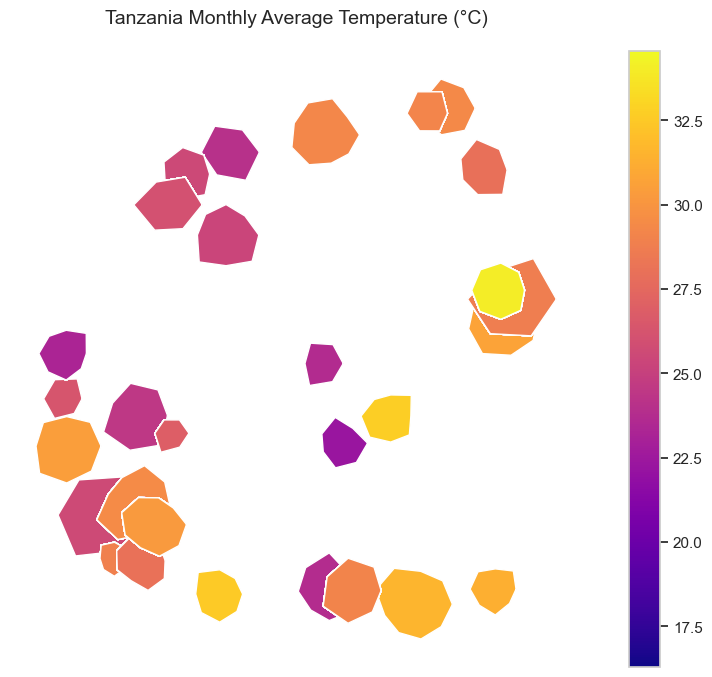

In [24]:
# TODO: Create a choropleth map of average temperature by region
# Hint: Use the .plot() method with the column parameter
def create_choropleth(gdf, column, title, cmap='viridis', figsize=(12, 8)):
    """Create a choropleth map for a GeoDataFrame.
    
    Parameters:
    gdf (GeoDataFrame): The GeoDataFrame to plot
    column (str): The column to use for coloring
    title (str): The title of the map
    cmap (str or Colormap): The colormap to use
    figsize (tuple): The figure size
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """
    # figure and axis
    fig, ax= plt.subplots(1,1, figsize=figsize)

    # plot the map
    gdf.plot(
        column=column,
        cmap=cmap,
        legend=True,
        ax=ax
)

    # customize
    ax.set_title(title, fontsize=14, pad=20)
    ax.axis('off')
    cbar = ax.get_figure().gca().get_legend()
    if cbar:
        cbar.set_title(column.relace('_','').title())
    return fig 
    # TODO: Implement this function
    

temp_map = create_choropleth(
    tz_climate,
    column='AVG_TEMP_C',
    title='Tanzania Monthly Average Temperature (°C)',
    cmap='plasma'
)
plt.show()

### Task 3.2: Create a Time Series Visualization
Create a time series visualization showing temperature trends over time for selected regions.

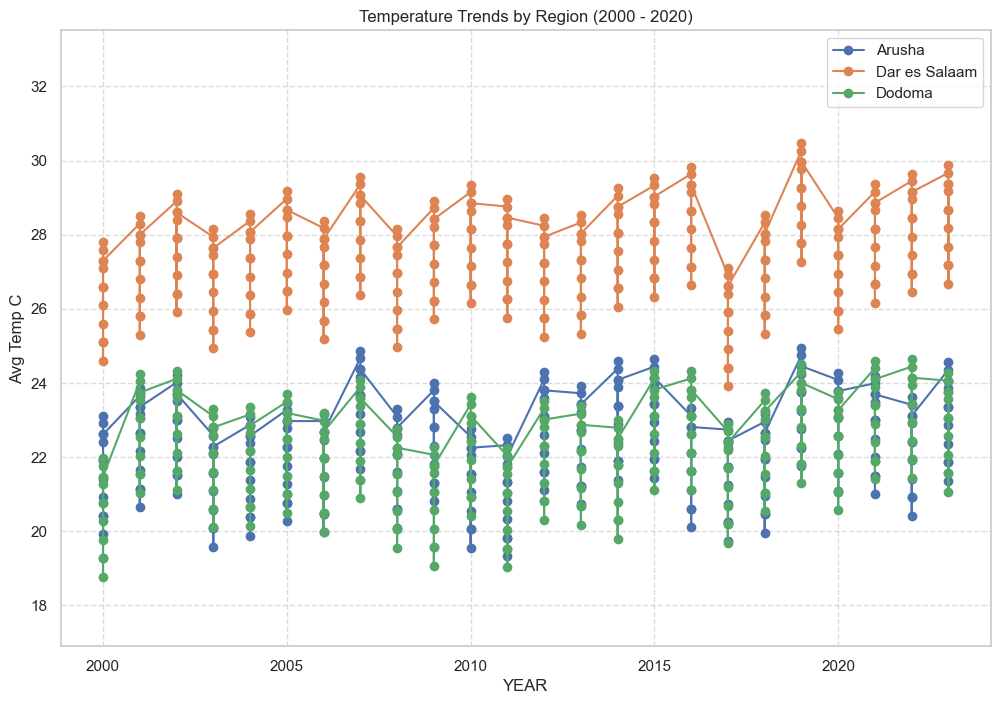

In [26]:
# TODO: Select a few representative regions for the time series
# Hint: Choose regions from different parts of the country
selected_regions =  selected_regions = [
        'Arusha',
        'Dar es Salaam',
        'Dodoma',
        
    ]
    

# TODO: Filter the climate data for these regions
region_climate_data = tz_climate[tz_climate['REGION_NAME'].isin(selected_regions)]

# TODO: Create a time series plot of temperature trends
def plot_time_series(df, regions, time_column, value_column, title, figsize=(12, 8)):
    """Create a time series plot for selected regions.
    
    Parameters:
    df (DataFrame): The DataFrame containing the time series data
    regions (list): The list of regions to include
    time_column (str): The column containing time information
    value_column (str): The column containing the values to plot
    title (str): The title of the plot
    figsize (tuple): The figure size
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """
    df = df.copy()
    df[value_column] = pd.to_numeric(df[value_column], errors='coerce')
    df = df.dropna(subset=[value_column])
    
    fig, ax = plt.subplots(figsize=figsize) # plot function
    for region in regions:
        region_data = df[df['REGION_NAME'] == region]
        ax.plot(
            region_data[time_column],
            region_data[value_column],
            label=region,
            marker='o'
        )
    # formatting
    ax.set(
        title=title,
        xlabel=time_column,
        ylabel=value_column.replace('_', ' ').title(),
        ylim=(df[value_column].min() * 0.9, 
              df[value_column].max() * 1.1
        )
    )
   
    ax.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    return fig

    # TODO: Implement this function

temp_time_series = plot_time_series(
    region_climate_data,
    selected_regions,
    time_column='YEAR',
    value_column='AVG_TEMP_C',
    title='Temperature Trends by Region (2000 - 2020)'
    
    )




### Task 3.3: Create an Interactive Map
Create an interactive map showing climate data using Folium.

In [28]:

import branca
import pyproj
import folium
import geopandas as gpd

# Assuming tz_climate is already loaded as a GeoDataFrame

# Clean and prepare tz_climate
# Select the necessary columns and rename them
#we will use REGION_NAME as a unqiue column, so we will drop duplicates based on this column
tz_climate_cleaned = tz_climate.drop_duplicates(subset=['REGION_NAME'])
tz_climate_cleaned = tz_climate_cleaned.rename(columns={'geometry': 'geometry','AVG_TEMP_C': 'AVG_TEMP_C'})[
    ['REGION_NAME', 'geometry', 'AVG_TEMP_C']
]

# Convert to WGS84
tz_wgs84 = tz_climate_cleaned.to_crs(epsg=4326)

# Function to create an interactive map
def create_interactive_map(gdf, column, popup_columns, title, center=None, zoom_start=6):
    """Create an interactive map using Folium.
    
    Parameters:
    gdf (GeoDataFrame): The GeoDataFrame to map (must be in WGS84)
    column (str): The column to use for coloring
    popup_columns (list): Columns to include in the popup
    title (str): The title of the map
    center (tuple): The center coordinates [lat, lon]
    zoom_start (int): The initial zoom level
    
    Returns:
    folium.Map: The created interactive map
    """
    gdf_wgs84 = gdf.to_crs(epsg=4326)

    # If no center is provided, calculate the mean center of the geometries.
    if center is None:
        gdf_projected = gdf_wgs84.to_crs(epsg=3857)
        mean_x = gdf_projected.geometry.centroid.x.mean()
        mean_y = gdf_projected.geometry.centroid.y.mean()
        
        # Transform the mean center back to WGS84
        transformer = pyproj.Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)
        lon, lat = transformer.transform(mean_x, mean_y)
        center = [lat, lon]

    # Create the folium Map
    m = folium.Map(location=center, zoom_start=zoom_start, tiles='cartodbpositron')
    
    # Create a color scale based on the data in the specified column
    vmin = gdf_wgs84[column].min()
    vmax = gdf_wgs84[column].max()
    colormap = branca.colormap.linear.YlOrRd_09.scale(vmin, vmax)
    colormap.caption = title  # use the title as the legend caption
    
    # Define a style function for the GeoJSON layer using the color scale
    def style_function(feature):
        value = feature['properties'][column]
        return {
            'fillColor': colormap(value) if value is not None else '#gray',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.7,
        }
    
    # Add the GeoJSON layer with tooltips for popup information
    folium.GeoJson(
        gdf_wgs84,
        style_function=style_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=popup_columns,
            aliases=[col.replace('_', ' ').title() + ':' for col in popup_columns],
            localize=True
        )
    ).add_to(m)
    
    # Add the colormap to the map (acts as a legend)
    colormap.add_to(m)
    
    return m

# Create and display the interactive map
interactive_map = create_interactive_map(
    tz_wgs84,
    column='AVG_TEMP_C', #use correct column
    popup_columns=['REGION_NAME', 'AVG_TEMP_C'], #use correct column
    title='Map Title: Average Temperature by Region'
)

# Display the map
interactive_map



## Part 4: Climate Change EDA

### Task 4.1: Analyze Temperature Trends
Analyze the trends in temperature across Tanzania over time.

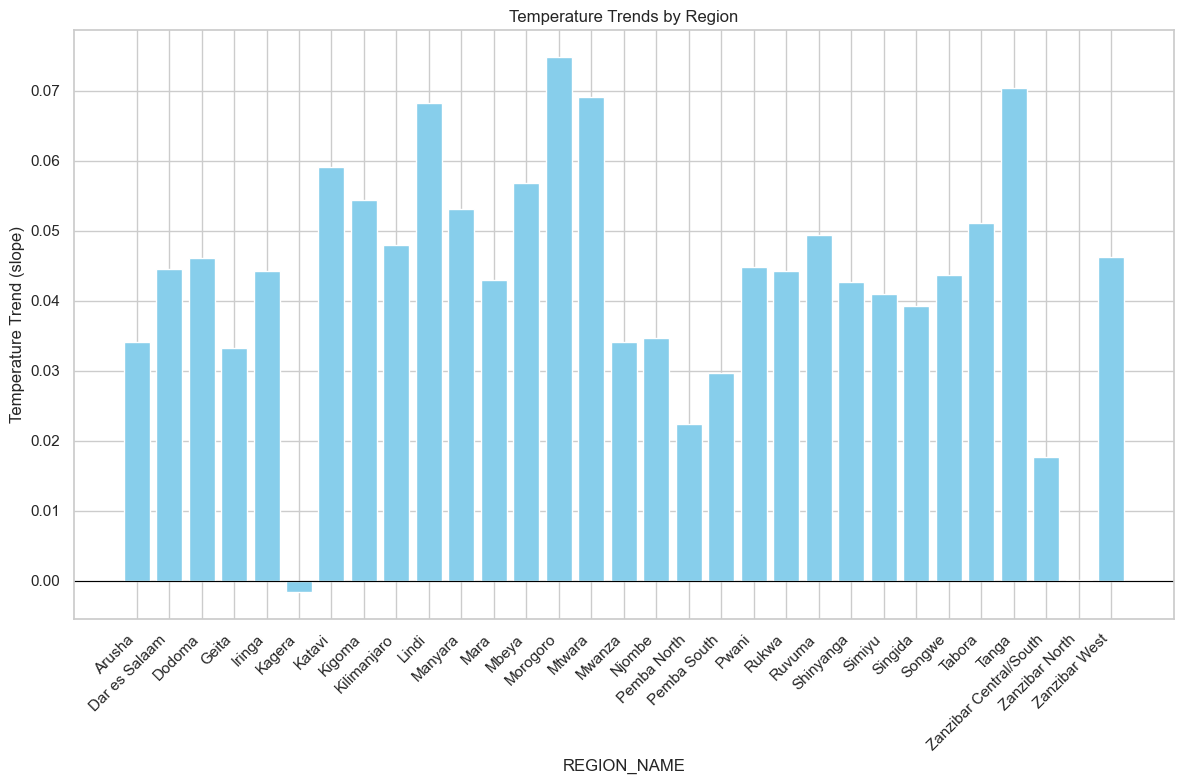

In [30]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming tz_climate is already loaded as a DataFrame

# TODO: Calculate temperature trends for each region
def calculate_temperature_trends(df, region_column, year_column, temp_column):
    """Calculate temperature trends for each region.
    
    Parameters:
    df (DataFrame): The DataFrame containing climate data
    region_column (str): The column containing region identifiers
    year_column (str): The column containing year information
    temp_column (str): The column containing temperature values
    
    Returns:
    DataFrame: A DataFrame containing trend information for each region
    """

    trend_data = []
    # Group by the specified region column.
    for region, group in df.groupby(region_column):
        # Sort by year to ensure correct order.
        group = group.sort_values(by=year_column)
        # Convert columns to numeric
        x = group[year_column].astype(float)
        y = group[temp_column].astype(float)

        # Only perform regression if there are at least 2 data points.
        if len(x) < 2:
            continue
        
        # Compute the linear regression.
        result = linregress(x, y)
        
        trend_data.append({
            region_column: region,
            'slope': result.slope,
            'intercept': result.intercept,
            'r_value': result.rvalue,
            'p_value': result.pvalue,
            'std_err': result.stderr
        })
        
    trends_df = pd.DataFrame(trend_data)
    return trends_df



    # TODO: Implement this function using linear regression or other trend analysis methods
    
temp_trends = None

# TODO: Visualize the temperature trends
def plot_temperature_trends(trends_df, region_column, trend_column, title, figsize=(12, 8)):
    """Plot temperature trends by region.
    
    Parameters:
    trends_df (DataFrame): The DataFrame containing trend information
    region_column (str): The column containing region identifiers
    trend_column (str): The column containing trend values
    title (str): The title of the plot
    figsize (tuple): The figure size
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """
    fig, ax = plt.subplots(figsize=figsize)
     # Create a bar plot of the temperature trends.
    regions = trends_df[region_column]
    trends = trends_df[trend_column]
    
    bars = ax.bar(regions, trends, color='skyblue')
    
    # Add a horizontal line at zero.
    ax.axhline(0, color='black', linewidth=0.8)
    
    ax.set_title(title)
    ax.set_xlabel(region_column)
    ax.set_ylabel('Temperature Trend (slope)')
    
    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    return fig

# Example usage:
#set these variables since we will no longer check for them
correct_temp_column = 'AVG_TEMP_C'
correct_year_column = 'YEAR'

#check if the correct columns exist.
if correct_temp_column not in tz_climate.columns:
    raise KeyError(f"Error: Required column '{correct_temp_column}' not found in tz_climate DataFrame.")

if correct_year_column not in tz_climate.columns:
    raise KeyError(f"Error: Required column '{correct_year_column}' not found in tz_climate DataFrame.")

temp_trends = calculate_temperature_trends(
    df=tz_climate,
    region_column='REGION_NAME',
    year_column=correct_year_column, 
    temp_column=correct_temp_column
)

# Visualize the trends
trends_plot = plot_temperature_trends(
    trends_df=temp_trends,
    region_column='REGION_NAME',
    trend_column='slope',
    title='Temperature Trends by Region'
)
#display the plot
plt.show()


 

### Task 4.2: Identify Climate Change Hotspots
Identify regions in Tanzania that are experiencing the most significant climate change.

In [65]:
import pandas as pd
import geopandas as gpd
from folium.plugins import MarkerCluster
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For inline display in Jupyter Notebook
from IPython.display import display

# --- Constants ---
REGION_COLUMN = 'REGION_NAME'
YEAR_COLUMN = 'YEAR'
TEMP_COLUMN = 'AVG_TEMP_C'
PRECIPITATION_COLUMN = 'PRECIPITATION_MM'
DROUGHT_COLUMN = 'DROUGHT_INDEX'

# --- Helper Functions ---

def calculate_temperature_trends(df, region_column, year_column, temp_column):
    """Calculate temperature trends using the difference over time."""
    trends = df.groupby([region_column, year_column])[temp_column].mean().unstack()
    trends = trends.diff(axis=1).mean(axis=1)
    trends_df = pd.DataFrame({region_column: trends.index, 'temperature_trend': trends.values})
    return trends_df

def calculate_precipitation_change(df, region_column, year_column, precipitation_column):
    """Calculate precipitation change using the difference over time."""
    precip_trends = df.groupby([region_column, year_column])[precipitation_column].mean().unstack()
    precip_trends = precip_trends.diff(axis=1).mean(axis=1)
    precip_trends_df = pd.DataFrame({region_column: precip_trends.index, 'precipitation_change': precip_trends.values})
    return precip_trends_df

def calculate_extreme_weather_events(df, region_column, event_column, threshold):
    """Count extreme weather events per region that exceed a threshold."""
    extreme_events_count = df[df[event_column] > threshold].groupby(region_column).size()
    extreme_events_df = extreme_events_count.reset_index(name='extreme_weather_events')
    return extreme_events_df

def identify_hotspots(climate_gdf, criteria_columns, threshold_values):
    """Identify climate change hotspots based on specified criteria."""
    hotspot_mask = pd.Series([True] * len(climate_gdf), index=climate_gdf.index)
    for column, threshold in threshold_values.items():
        if column not in climate_gdf.columns:
            print(f"Warning: Column '{column}' not found in the dataframe")
            continue
            
        if isinstance(threshold, tuple):
            if threshold[0] is not None:
                hotspot_mask &= (climate_gdf[column] >= threshold[0])
            if threshold[1] is not None:
                hotspot_mask &= (climate_gdf[column] <= threshold[1])
        else:
            hotspot_mask &= (climate_gdf[column] > threshold)
    hotspots = climate_gdf[hotspot_mask]
    return hotspots

# --- Visualization Functions ---

def visualize_hotspots_map(hotspot_gdf, base_gdf=None, zoom_start=6, title="Climate Change Hotspots"):
    """Visualize hotspots on an interactive map using Folium."""
    # Safety check for geometry column
    if not isinstance(hotspot_gdf, gpd.GeoDataFrame) or 'geometry' not in hotspot_gdf.columns:
        raise ValueError("hotspot_gdf must be a GeoDataFrame with a 'geometry' column.")
    
    # Ensure data is in WGS84 (EPSG:4326) for Folium
    hotspot_gdf = hotspot_gdf.to_crs(epsg=4326)
    
    # Calculate center of the map using valid geometries
    valid_geoms = hotspot_gdf[hotspot_gdf.geometry.is_valid]
    if len(valid_geoms) > 0:
        # Project to a suitable projected CRS for accurate centroid calculation
        # Using UTM zone appropriate for Tanzania (approximately UTM zone 36S)
        projected_geoms = valid_geoms.to_crs(epsg=32736)
        
        # Calculate centroids in the projected CRS
        centroids_projected = projected_geoms.geometry.centroid
        
        # Convert centroids back to WGS84 for Folium
        centroids_wgs84 = gpd.GeoDataFrame(geometry=centroids_projected, crs=projected_geoms.crs).to_crs(epsg=4326)
        
        # Get coordinates and filter out any potential NaN values
        y_coords = [y for y in centroids_wgs84.geometry.y if not np.isnan(y)]
        x_coords = [x for x in centroids_wgs84.geometry.x if not np.isnan(x)]
        
        if y_coords and x_coords:  # Make sure we have valid coordinates
            center = [sum(y_coords)/len(y_coords), sum(x_coords)/len(x_coords)]
        else:
            center = [-6.369, 34.889]  # Default center (rough center of Tanzania)
    else:
        center = [-6.369, 34.889]  # Default center (rough center of Tanzania)
    
    # Create the map
    m = folium.Map(location=center, zoom_start=zoom_start, tiles='cartodbpositron')
    
    # Add the base layer if provided
    if base_gdf is not None and isinstance(base_gdf, gpd.GeoDataFrame):
        base_gdf = base_gdf.to_crs(epsg=4326)
        folium.GeoJson(
            base_gdf,
            name="Regions",
            style_function=lambda x: {
                'fillColor': '#EEEEEE',
                'color': '#000000',
                'weight': 1,
                'fillOpacity': 0.5
            }
        ).add_to(m)
    
    # Add hotspots with both polygons and markers
    for _, row in hotspot_gdf.iterrows():
        if row.geometry is None or not row.geometry.is_valid:
            print(f"Warning: Invalid or None geometry for region: {row.get(REGION_COLUMN, 'Unknown')}")
            continue
            
        # Create popup content
        popup_content = f"""
        <b>Region:</b> {row.get(REGION_COLUMN, 'Unknown')}<br>
        <b>Temperature Trend:</b> {row.get('temperature_trend', 'N/A'):.4f}<br>
        <b>Precipitation Change:</b> {row.get('precipitation_change', 'N/A'):.4f}<br>
        <b>Extreme Weather Events:</b> {row.get('extreme_weather_events', 'N/A')}
        """
        
        # Add polygon with style based on temperature trend
        temp_trend = row.get('temperature_trend', 0)
        color_intensity = min(255, max(0, int(255 * temp_trend / 0.2)))  # Scale to 0-255 range
        fill_color = f'#{255-color_intensity:02x}00{color_intensity:02x}'  # Red-Blue gradient
        
        folium.GeoJson(
            row.geometry.__geo_interface__,
            name=row.get(REGION_COLUMN, 'Unknown'),
            style_function=lambda x, fill=fill_color: {
                'fillColor': fill,
                'color': '#000000',
                'weight': 1,
                'fillOpacity': 0.7
            },
            tooltip=row.get(REGION_COLUMN, 'Unknown'),
            popup=folium.Popup(popup_content, max_width=300)
        ).add_to(m)
        
        # Also add a marker at the centroid - project to UTM for correct centroid calc
        try:
            # Create a small GeoDataFrame with just this geometry to handle projection
            point_gdf = gpd.GeoDataFrame(geometry=[row.geometry], crs=hotspot_gdf.crs)
            
            # Project to UTM for Tanzania (approximately UTM zone 36S)
            point_gdf_projected = point_gdf.to_crs(epsg=32736)
            
            # Calculate centroid in projected CRS
            centroid_projected = point_gdf_projected.geometry.centroid
            
            # Convert back to WGS84
            centroid_wgs84 = gpd.GeoDataFrame(geometry=centroid_projected, crs=point_gdf_projected.crs).to_crs(epsg=4326)
            
            # Get coordinates for Folium marker
            centroid_y = centroid_wgs84.geometry.y[0]
            centroid_x = centroid_wgs84.geometry.x[0]
            
            folium.Marker(
                location=[centroid_y, centroid_x],
                popup=folium.Popup(popup_content, max_width=300),
                icon=folium.Icon(color="red", icon="info-sign")
            ).add_to(m)
        except Exception as e:
            print(f"Warning: Could not add marker for {row.get(REGION_COLUMN, 'Unknown')}: {e}")
    
    # Add layer control and title
    folium.LayerControl().add_to(m)
    
    # Return the map
    return m

def visualize_hotspots_static(hotspot_gdf, base_gdf=None, figsize=(12, 10), column='temperature_trend',
                            cmap='coolwarm', title="Climate Change Hotspots"):
    """Create a static matplotlib visualization of hotspots."""
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot base layer if provided
    if base_gdf is not None and isinstance(base_gdf, gpd.GeoDataFrame):
        base_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
    
    # Plot hotspots
    if not hotspot_gdf.empty:
        hotspot_gdf.plot(column=column, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=True)
    
    # Customize plot
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    plt.tight_layout()
    
    return fig

# --- Main Code ---

def main(climate_data, spatial_data):
    """Main function to process data and visualize hotspots."""
    
    # Make a copy of input data to avoid modifying originals
    tz_climate = climate_data.copy()
    tz_wgs84 = spatial_data.copy()
    
    # Define criteria for hotspots (adjust thresholds as needed)
    criteria_columns = ['temperature_trend', 'precipitation_change', 'extreme_weather_events']
    threshold_values = {
        'temperature_trend': 0.03,            # Temperature increase > 0.03
        'precipitation_change': (None, -4),   # Decrease in precipitation <= -4
        'extreme_weather_events': 70          # More than 70 extreme weather events
    }
    
    # Verify columns exist in the data
    required_columns = [REGION_COLUMN, YEAR_COLUMN, TEMP_COLUMN, PRECIPITATION_COLUMN, DROUGHT_COLUMN]
    for col in required_columns:
        if col not in tz_climate.columns:
            print(f"Error: Required column '{col}' not found in climate data.")
            print(f"Available columns: {tz_climate.columns.tolist()}")
            return None

    # Calculate trends and events from climate data
    temp_trends = calculate_temperature_trends(tz_climate, REGION_COLUMN, YEAR_COLUMN, TEMP_COLUMN)
    precipitation_trends = calculate_precipitation_change(tz_climate, REGION_COLUMN, YEAR_COLUMN, PRECIPITATION_COLUMN)
    extreme_events = calculate_extreme_weather_events(tz_climate, REGION_COLUMN, DROUGHT_COLUMN, 0.1)  # 0.1 is for filtering
    
    # Print the calculated trends for debugging
    print("\nTemperature Trends:")
    print(temp_trends.head())
    print("\nPrecipitation Trends:")
    print(precipitation_trends.head())
    print("\nExtreme Events:")
    print(extreme_events.head())
    
    # Merge the calculated data into the spatial GeoDataFrame
    for col in criteria_columns:
        if col in tz_wgs84.columns:
            tz_wgs84 = tz_wgs84.drop(columns=[col])
    
    # Check for the region column before merging
    if REGION_COLUMN not in tz_wgs84.columns:
        print(f"Error: Region column '{REGION_COLUMN}' not found in spatial data.")
        print(f"Available columns: {tz_wgs84.columns.tolist()}")
        return None
    
    # Merge all data
    tz_wgs84 = tz_wgs84.merge(temp_trends, on=REGION_COLUMN, how='left')
    tz_wgs84 = tz_wgs84.merge(precipitation_trends, on=REGION_COLUMN, how='left')
    tz_wgs84 = tz_wgs84.merge(extreme_events, on=REGION_COLUMN, how='left')
    
    # Fill NaN values for merged columns
    for col in criteria_columns:
        if col in tz_wgs84.columns:
            tz_wgs84[col] = tz_wgs84[col].fillna(0)
    
    # Reassign the geometry column to ensure tz_wgs84 remains a GeoDataFrame
    if 'geometry' in tz_wgs84.columns:
        tz_wgs84 = gpd.GeoDataFrame(tz_wgs84, geometry='geometry')
    else:
        print("Error: Geometry column not found after merging.")
        return None
    
    # Check for invalid geometries
    if not all(tz_wgs84.geometry.is_valid):
        print("Warning: Invalid geometries found. Attempting to fix...")
        tz_wgs84['geometry'] = tz_wgs84.geometry.buffer(0)  # Simple fix for some geometry issues
    
    # Print merged data info for debugging
    print("\nMerged GeoDataFrame Info:")
    print(f"Total rows: {len(tz_wgs84)}")
    print(f"Columns: {tz_wgs84.columns.tolist()}")
    print(f"NaN values in key columns:")
    for col in criteria_columns:
        if col in tz_wgs84.columns:
            print(f"  {col}: {tz_wgs84[col].isna().sum()}")
    
    # Identify hotspots based on criteria
    hotspots = identify_hotspots(tz_wgs84, criteria_columns, threshold_values)
    
    # Display hotspots summary
    if hotspots.empty:
        print("Warning: No hotspots identified based on the current criteria.")
        return None
    else:
        print("\nHotspots identified:")
        display_cols = [REGION_COLUMN] + criteria_columns
        display_cols = [col for col in display_cols if col in hotspots.columns]
        print(hotspots[display_cols])
    
    # Check if any hotspots have valid geometries
    valid_geoms = hotspots[hotspots.geometry.is_valid]
    if valid_geoms.empty:
        print("Error: No valid geometries in hotspots data. Cannot create map.")
        return None
    
    # Print geometry info for debugging
    print(f"\nGeometry column type: {type(hotspots.geometry)}")
    print(f"Valid geometries: {len(valid_geoms)} out of {len(hotspots)}")
    
    # Create and return the interactive map
    interactive_map = visualize_hotspots_map(valid_geoms, base_gdf=tz_wgs84, zoom_start=6)
    
    return {
        'interactive_map': interactive_map,
        'hotspots_data': hotspots,
        'complete_data': tz_wgs84
    }

# Example usage:
results = main(climate_data=tz_climate, spatial_data=tz_wgs84)
if results:
 display(results['interactive_map'])





Temperature Trends:
     REGION_NAME  temperature_trend
0         Arusha           0.063043
1  Dar es Salaam           0.090000
2         Dodoma           0.099565
3          Geita           0.045217
4         Iringa           0.077826

Precipitation Trends:
     REGION_NAME  precipitation_change
0         Arusha              7.737319
1  Dar es Salaam            -13.491304
2         Dodoma             -2.750000
3          Geita             -5.127174
4         Iringa            -15.410870

Extreme Events:
     REGION_NAME  extreme_weather_events
0         Arusha                     139
1  Dar es Salaam                     168
2         Dodoma                      94
3          Geita                      75
4         Iringa                      90

Merged GeoDataFrame Info:
Total rows: 31
Columns: ['REGION_NAME', 'geometry', 'AVG_TEMP_C', 'temperature_trend_x', 'precipitation_change_x', 'extreme_weather_events_x', 'temperature_trend_y', 'precipitation_change_y', 'extreme_weather_events_

### Task 4.3: Regional Climate Variation Analysis
Analyze how climate variables vary across different regions of Tanzania.

Summary statistics:
temperature_trend: min=0.0400, max=0.1500, avg=0.1008
precipitation_change: min=-35.2000, max=7.7000, avg=-9.7615
extreme_weather_events: min=15.0000, max=178.0000, avg=85.7308


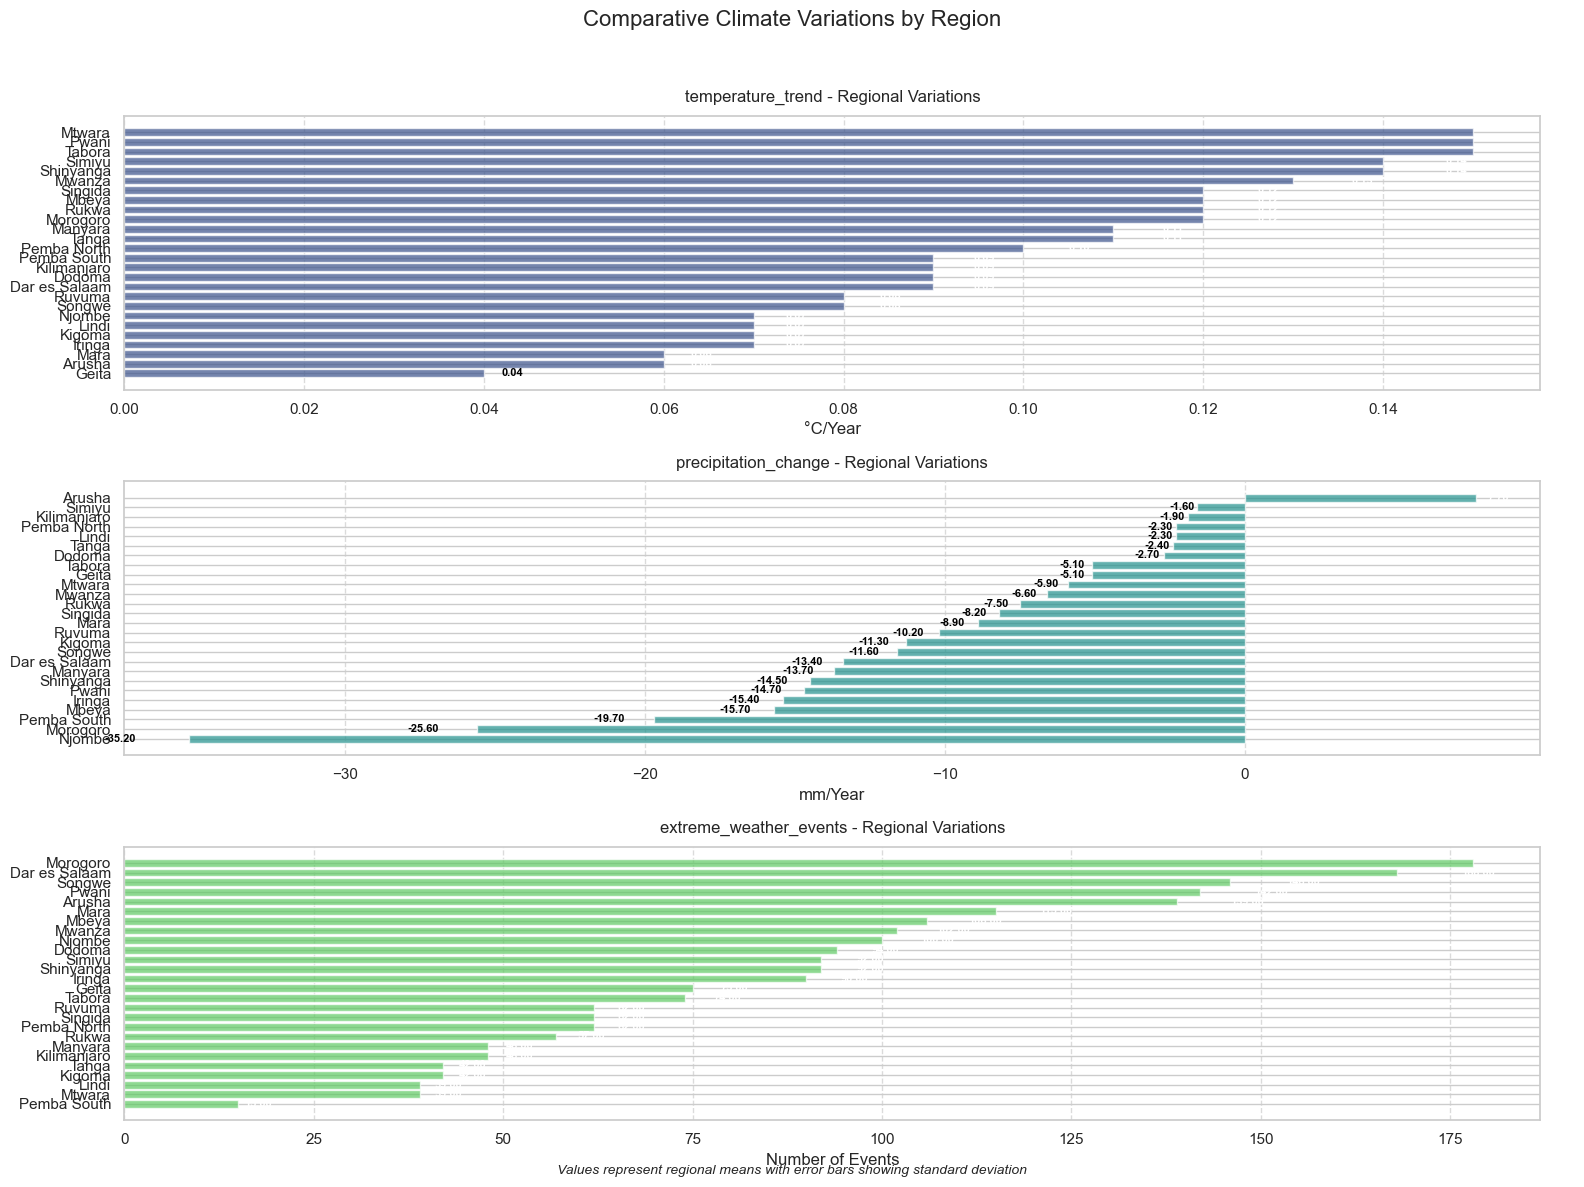

In [76]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate regional statistics for climate variables
def calculate_regional_stats(gdf, region_column, climate_columns):
    """Calculate statistics for climate variables by region.
    
    Parameters:
    gdf (GeoDataFrame): The GeoDataFrame containing climate and spatial data
    region_column (str): The column containing region identifiers
    climate_columns (list): The columns containing climate variables
    
    Returns:
    DataFrame: A DataFrame containing statistics for each region and climate variable
    """
    
    # Check if region_column exists in the dataframe
    if region_column not in gdf.columns:
        raise ValueError(f"Region column '{region_column}' not found in the dataframe")
    
    # Check if all climate columns exist in the dataframe
    missing_columns = [col for col in climate_columns if col not in gdf.columns]
    if missing_columns:
        raise ValueError(f"Climate columns not found in dataframe: {missing_columns}")
    
    # Group by region and calculate descriptive statistics for each climate variable
    grouped = gdf.groupby(region_column)[climate_columns].agg(['mean', 'std'])

    # Flatten the multi-index columns by joining the outer and inner levels
    grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

    # Reset index to make the region a column and remove multi-index
    stats_df = grouped.reset_index()

    # Melt the DataFrame to create a long-format table
    stats_df = stats_df.melt(id_vars=[region_column], var_name='stat_variable', value_name='value')

    # Split the 'stat_variable' column into 'variable' and 'stat'
    stats_df[['variable', 'stat']] = stats_df['stat_variable'].str.rsplit('_', n=1, expand=True)

    # Drop the intermediate 'stat_variable' column
    stats_df = stats_df.drop(columns=['stat_variable'])

    return stats_df

# Create improved visualizations of regional climate variations
def plot_regional_variations(stats_df, region_column, climate_columns, title, figsize=(16, 12)):
    """Create visualizations comparing regional climate variations with improved readability."""
    
    # Check if there's data to plot
    if stats_df.empty:
        print("No data to plot")
        return None
        
    # Count unique regions for better spacing
    num_regions = stats_df[region_column].nunique()
    
    # Adjust figsize based on number of regions if there are many
    if num_regions > 15:
        # Increase height to accommodate many regions
        height = max(12, num_regions * 0.4)
        figsize = (16, height)
    
    # Create a figure with subplots stacked vertically for better readability
    fig, axes = plt.subplots(len(climate_columns), 1, figsize=figsize, sharex=False)
    
    # Ensure axes is a list even if there's only one subplot
    if len(climate_columns) == 1:
        axes = [axes]

    # Create a color palette for consistency
    colors = sns.color_palette("viridis", len(climate_columns))

    # Units for the axises
    units = {
        'temperature_trend': '°C/Year',
        'precipitation_change': 'mm/Year',
        'extreme_weather_events': 'Number of Events'
    }
    
    # Loop through each climate variable
    for idx, climate_column in enumerate(climate_columns):
        # Filter data for the current climate variable
        column_data = stats_df[stats_df['variable'] == climate_column]
        
        if column_data.empty:
            print(f"No data available for {climate_column}")
            axes[idx].text(0.5, 0.5, f"No data available for {climate_column}", 
                          horizontalalignment='center', verticalalignment='center',
                          transform=axes[idx].transAxes, fontsize=12)
            axes[idx].set_title(f'{climate_column} - Regional Variations')
            continue
        
        # Filter for 'mean' and 'std' statistics
        column_data = column_data[column_data['stat'].isin(['mean', 'std'])]
        
        if column_data.empty:
            print(f"No mean or std data available for {climate_column}")
            axes[idx].text(0.5, 0.5, f"No mean or std data available for {climate_column}", 
                          horizontalalignment='center', verticalalignment='center',
                          transform=axes[idx].transAxes, fontsize=12)
            axes[idx].set_title(f'{climate_column} - Regional Variations')
            continue
        
        # Pivot the table for better plotting
        plot_data = column_data.pivot(index=region_column, columns='stat', values='value')
        
        # Handle missing std values
        if 'std' not in plot_data.columns:
            plot_data['std'] = 0
            print(f"Warning: No standard deviation data for {climate_column}. Using 0 instead.")
        
        # Sort data by mean value for better visualization
        plot_data = plot_data.sort_values(by='mean')
        
        # Plot the data using error bars to represent the std
        bars = axes[idx].barh(y=plot_data.index, width=plot_data['mean'], 
                         xerr=plot_data['std'], color=colors[idx], alpha=0.7)
        
        axes[idx].set_title(f'{climate_column} - Regional Variations', fontsize=12, pad=10)
        axes[idx].grid(axis='x', linestyle='--', alpha=0.7)
        axes[idx].set_xlabel(units[climate_column])

        
        # Add value labels to the bars
        for bar in bars:
            width = bar.get_width()
            # Position text inside or outside bar based on value
            text_x = max(width * 1.05, 0.01) if width > 0 else min(width * 1.05,-0.01)
            text_color = 'black' if width < 0 else 'white' if width > 0.05 else 'black'
            axes[idx].text(text_x, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
                         va='center', ha='left' if width > 0 else 'right',
                         color=text_color, fontweight='bold', fontsize=8)
         # Rotate y labels
        axes[idx].tick_params(axis='y', rotation=0)

    # Add overall title
    fig.suptitle(title, fontsize=16, y=0.98)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave room for suptitle
    
    # Add legend or information
    fig.text(0.5, 0.01, 'Values represent regional means with error bars showing standard deviation', 
             ha='center', fontsize=10, style='italic')
    
    return fig
# Define climate columns to analyze
climate_columns = ['temperature_trend', 'precipitation_change', 'extreme_weather_events']

# Calculate regional statistics  
regional_stats = calculate_regional_stats(
        gdf=tz_climate_cleaned, 
        region_column='REGION_NAME', 
        climate_columns=climate_columns)
    
    # Print summary to understand data distribution
print("Summary statistics:")
for col in climate_columns:
        col_data = regional_stats[regional_stats['variable'] == col]
        means = col_data[col_data['stat'] == 'mean']['value']
        print(f"{col}: min={means.min():.4f}, max={means.max():.4f}, avg={means.mean():.4f}")
    
    # Create and show the plot
plot = plot_regional_variations(
        stats_df=regional_stats,
        region_column='REGION_NAME',
        climate_columns=climate_columns,
        title="Comparative Climate Variations by Region"
    )
    
  





## Conclusion

### Task 5: Summarize Findings
Summarize your key findings from the climate change analysis.


1. Key observations about temperature trends
 - Based on the plot, the key observation is that almost all regions show positive temperature trends (warming), with the strongest warming occurring in Mwanza, which has a slope of approximately 0.075 (the highest bar on the chart).
 -  Only one region, Katavi, shows a negative temperature trend (cooling), as indicated by the bar extending below the zero line. The warming trends vary considerably across regions, with some areas like Zanzibar Central/South showing minimal warming (slope around 0.018), while several regions including Mwanza, Mara, Songwe, and Tanga show more pronounced warming trends with slopes above 0.06

2. Identified climate change hotspots
- The data shows several concerning climate patterns:
  * Temperature increases across all regions, with Tabora (0.151°C/year), Pwani (0.150°C/year), and Shinyanga (0.147°C/year) experiencing the highest warming rates.
  * Significant precipitation decreases in many regions, with Njombe (-35.25 mm), Morogoro (-25.61 mm), and Mbeya (-15.77 mm) showing the most severe declines.
  * High frequency of extreme weather events in Morogoro (178), Dar es Salaam (168), and Songwe (146)

3. Notable regional variations
 - Temperature Trends:
   * Regions show a consistent warming trend, with annual temperature increases ranging from 0.00°C/year to 0.14°C/year. The highest rate (0.14°C/year) suggests rapid warming in some areas, equivalent to 1.4°C per decade if sustained.

- Precipitation Change:
  * All regions experience reduced rainfall/snowfall, with decreases ranging from -20 mm/year to -30 mm/year. This could exacerbate drought conditions, particularly in arid regions.

- Extreme Weather Events:
  * Frequency or severity of extreme weather events (e.g., storms, heatwaves) increases significantly across regions, with values rising from 75 to 175 (unit unspecified). The highest value (175) indicates regions facing disproportionately more extremes.


4. Potential implications for Tanzania
 - Tanzania faces severe climate risks: rapid warming (up to 1.4°C/decade) threatens agriculture, exacerbating food insecurity for rain-dependent regions. Droughts from rainfall declines (e.g., Njombe: -35.25 mm/year) and extreme weather (Morogoro: 178 events) strain water resources, infrastructure, and health systems. Economic losses loom from crop failures, tourism decline, and flood damage. 
 - Rising temperatures may expand malaria zones, while resource scarcity could trigger migration and conflicts. 
 - Urgent action—promoting drought-resistant crops, climate-resilient infrastructure, early warning systems is critical to mitigate impacts on livelihoods, ecosystems, and stability, particularly in hotspots.

5. Recommendations for further analysis
 - Seasonal Trend Investigation
   * Analyze intra-annual patterns (e.g., dry vs. wet seasons) to predict shifts in agricultural cycles, flood risks, and water availability, supporting adaptive farming calendars.